In [10]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [11]:
data=pd.read_csv('Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Iteration : 0 Cost Function: 0.49913427761117773
Iteration : 1000 Cost Function: 0.24784572652067366
Iteration : 2000 Cost Function: 0.23435126754757
Iteration : 3000 Cost Function: 0.2326586327681224
Iteration : 4000 Cost Function: 0.2323176132989865
Iteration : 5000 Cost Function: 0.23223420126729538
Iteration : 6000 Cost Function: 0.23221146940603066
Iteration : 7000 Cost Function: 0.23220485914992203
Iteration : 8000 Cost Function: 0.23220286615768915
Iteration : 9000 Cost Function: 0.23220225383700663
Iteration : 10000 Cost Function: 0.23220206392379636
Input : [1.75700953 1.40341936 5.40580863 2.53202371] Prediction: 10841442.591919437


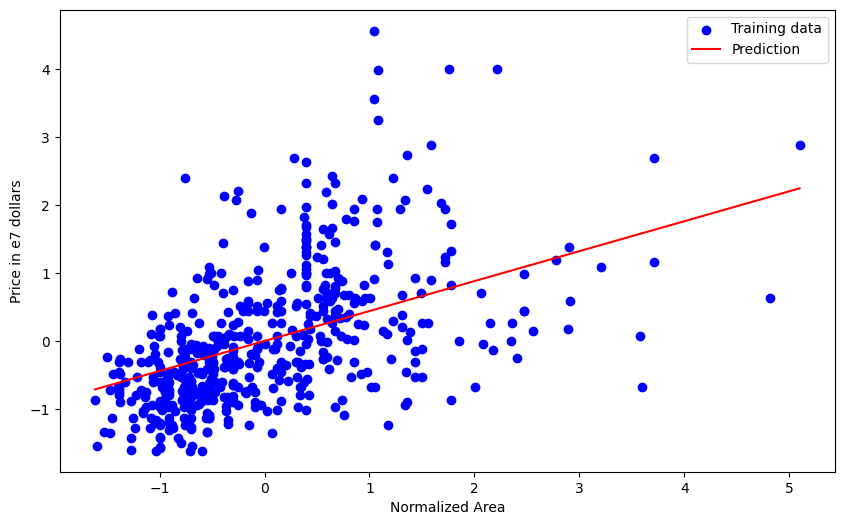

In [14]:
class LinReg:
    
    # Loading the dataset
    def __init__(self):
        # Size/Area, Number of Bedrooms, Number of Bathrooms, Number of Stories : Price in dollars
        self.X_train=data[['area','bedrooms','bathrooms','stories']].values
        self.y_train=data['price']
        self.w=np.zeros(4)
        self.b=0
        self.alpha=1e-3
        self.iterations=10000
        self.m,self.n = self.X_train.shape
        self.input=np.array([8960,4,4,4])

        # All hyper parameters must be inputed by the user (iterations,alpha etcc)
        # predict method gives y_pred when x_pred is given
        # Replicate scilearn format of writing code
        # Do KNN using scilearn

        # Z-score normalization
        self.mean = np.mean(self.X_train, axis=0)
        self.std = np.std(self.X_train, axis=0)
        self.mean_y = np.mean(self.y_train, axis=0)
        self.std_y = np.std(self.y_train, axis=0)
        
        self.X_train = (self.X_train - self.mean) / self.std
        self.y_train=(self.y_train - self.mean_y)/self.std_y
        self.input = (self.input - self.mean) / self.std


    def cost_function(self):
        J=0
        for i in range(self.m):
            f_wb=np.dot(self.w,self.X_train[i]) + self.b
            J=J+(f_wb-self.y_train[i])**2
        return J/(2*self.m)

    def gradient(self):
        dj_dw=np.zeros(self.n)
        dj_db=0
        for i in range(self.m):
            f_wb=np.dot(self.w,self.X_train[i]) + self.b
            term=f_wb-self.y_train[i]
            for j in range(self.n):
                dj_dw[j]=dj_dw[j]+ (term*self.X_train[i,j])
            dj_db=dj_db+term
        dj_dw=dj_dw/self.m
        dj_db=dj_db/self.m
        return dj_dw,dj_db

    def gradient_descent(self):
        J_history=[]
        for i in range(self.iterations+1):
            dj_dw,dj_db=self.gradient()
            self.w=self.w - self.alpha*dj_dw
            self.b=self.b - self.alpha*dj_db
            if(i%1000==0):
                J=self.cost_function()
                print(f"Iteration : {i} Cost Function: {J}")
                J_history.append(J)
        return self.w,self.b,J_history

    def plot_data(self):
        plt.figure(figsize=(10, 6))
    
        plt.scatter(self.X_train[:, 0], self.y_train, color='blue', label='Training data')
    
        x_line = np.linspace(self.X_train[:, 0].min(), self.X_train[:, 0].max(), 100)
        y_line = self.w[0] * x_line + self.b
        plt.plot(x_line, y_line, color='red', label='Prediction')

        plt.xlabel('Normalized Area')
        plt.ylabel('Price in e7 dollars')
        plt.legend()
        plt.show()
        
        
        
def main():
    object=LinReg()
    w,b,J_history=object.gradient_descent()
    f_wb_final= (np.dot(w,object.input) + b)*object.std_y + object.mean_y
    print(f"Input : {object.input} Prediction: {f_wb_final}")

    # Plotting the data and the prediction line
    object.plot_data()

main()